Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

Problem Statement:

- Prepare a prediction model for profit of 50_startups data.

- Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

- R&D Spend -- Research and devolop spend in the past few years
- Administration -- spend on administration in the past few years
- Marketing Spend -- spend on Marketing in the past few years
- State -- states from which data is collected
- Profit -- profit of each state in the past few years

In [2]:
#Importing dataset
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
print('Number of Rows and Columns {}'.format(data.shape))

Number of Rows and Columns (50, 5)


In [4]:
#descriptive analysis
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Observation: There are no Null Values in the Data set by reading Counts from Above

In [5]:
#checking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Observation: all the data types are correct

Note: State is a Categorical feature we need to do some encoding or convert it into numerical values by putting dummy values

In [6]:
#Renaming the columns name to reduce its length
df=data.copy()
df=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
#Checking for missing values
df.isnull().sum()

RnD          0
admin        0
marketing    0
state        0
profit       0
dtype: int64

In [8]:
df[df.values==0.0]

,RnD,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


Note: Here the 0.00 values in marketing column is not considered as Null values

In [9]:
#Checking for Duplicated Values
df[df.duplicated()].shape

(0, 5)

In [10]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

There are no duplcate values in dataset

# Outlier Detection

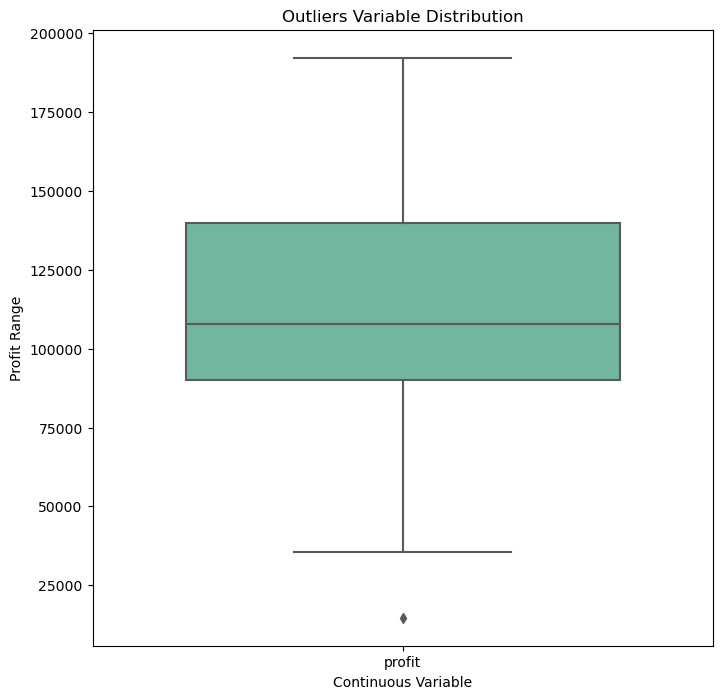

In [11]:
outliers = ['profit']
plt.rcParams['figure.figsize'] = [8,8]

sns.boxplot(data=df[outliers], orient="v", palette="Set2" , width=0.7)

plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
 
plt.show()

Some are outliers, but it’s not clear which one, so let’s plot the box plot relative to each state. We only need to pass the states column, and seaborn is smart enough to figure out the categories it has!

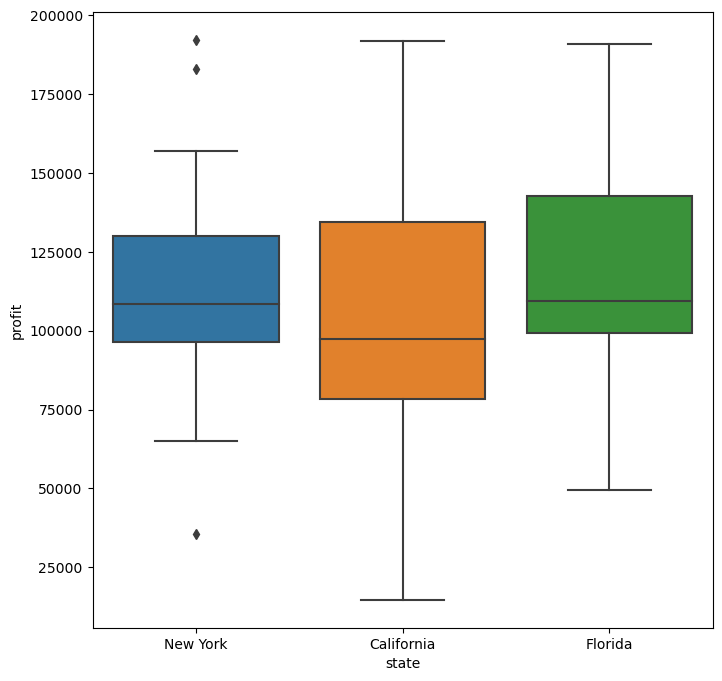

In [12]:
sns.boxplot(x = 'state', y = 'profit', data = df)
plt.show()

Note: State is a categorical variable. It’s good to plot each category (NY, CA, FL) respective to profit.

# Understanding Distribution

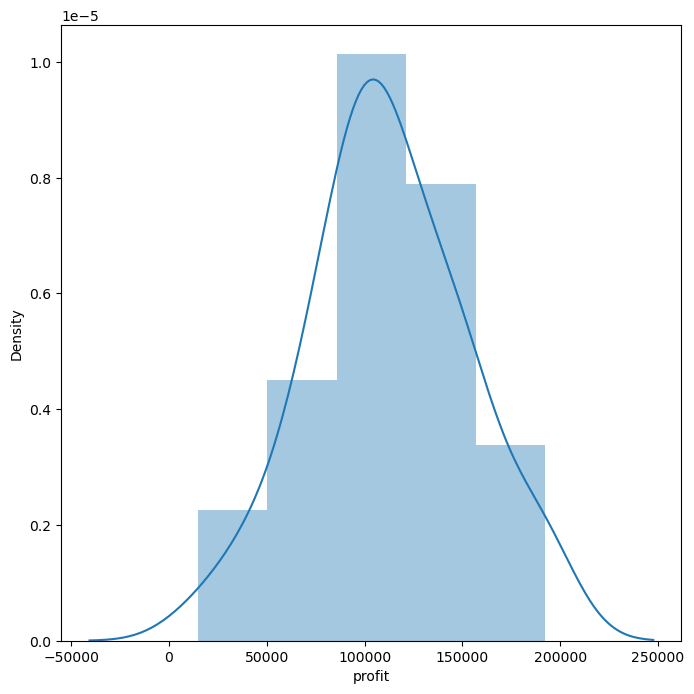

In [13]:
sns.distplot(df['profit'],bins=5,kde=True)
plt.show()

# Data Preprocessing

1.Creating Features And Labels

In [14]:
# spliting Dataset in Dependent & Independent Variables
X = df.iloc[:, :-2].values
y = df.iloc[:, 4].values
print(X)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

2.Encoding Categories/Labels

In [15]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2
0,165349.20,136897.80,47.0
1,162597.70,151377.59,46.0
2,153441.51,101145.55,45.0
3,144372.41,118671.85,44.0
4,142107.34,91391.77,43.0


Note: 0,1,2 are numeric encoded labels for state category

3.Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
 
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0) # performs the split

print(x_train)

[[1.3029813e+05 1.4553006e+05 4.0000000e+01]
 [1.1994324e+05 1.5654742e+05 2.8000000e+01]
 [1.0002300e+03 1.2415304e+05 1.0000000e+00]
 [5.4205000e+02 5.1743150e+04 0.0000000e+00]
 [6.5605480e+04 1.5303206e+05 8.0000000e+00]
 [1.1452361e+05 1.2261684e+05 2.9000000e+01]
 [6.1994480e+04 1.1564128e+05 7.0000000e+00]
 [6.3408860e+04 1.2921961e+05 5.0000000e+00]
 [7.8013110e+04 1.2159755e+05 3.0000000e+01]
 [2.3640930e+04 9.6189630e+04 1.4000000e+01]
 [7.6253860e+04 1.1386730e+05 3.4000000e+01]
 [1.5505730e+04 1.2738230e+05 3.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.9000000e+01]
 [9.1992390e+04 1.3549507e+05 2.7000000e+01]
 [6.4664710e+04 1.3955316e+05 1.2000000e+01]
 [1.3187690e+05 9.9814710e+04 4.2000000e+01]
 [9.4657160e+04 1.4507758e+05 3.1000000e+01]
 [2.8754330e+04 1.1854605e+05 1.6000000e+01]
 [0.0000000e+00 1.1698380e+05 4.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.6000000e+01]
 [9.3863750e+04 1.2732038e+05 2.6000000e+01]
 [4.4069950e+04 5.1283140e+04 1.9000000e+01]
 [7.704401

X,y — actual data(features and labels)

● train_size — defines the training size here 70% of data.

● (x_train,x_test),(y_train,y_test) — Train and Test data features, Train and Test data Labels

# Model Development

1. Selecting Model Architecture & Training

In [17]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


2. Predicting Results

In [18]:
y_pred = model.predict(x_test)
print(y_pred)

[103365.65430448 132409.63159464 133669.58924177  71596.33493623
 179574.8809234  114195.96899299  65656.85292429  97938.81018901
 114412.29898539 169772.36831918  96050.9051499   87515.25731045
 110242.6075272   90000.89195708 127479.23515393]


3. Evaluating Performance Based On Model Score

In [19]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)
 
training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9324057207634493
Model Score/Performance on Training data 0.9506671824404849


4. Evaluating Performance Based On Metrics

● MAE- Mean Absolute Error similar to the above two but uses absolute value and does not penalize significant errors.

● MSE — Mean Squared Error is a statistical measure that captures the error rate of the regression line fit. It penalizes the high errors but results in square units.

● RMSE — Square root of MSE to ensure the same measurement units for better interoperability. (I consider it as best!)

● R²- The person correlation coefficient, a statistical measure that describes the strength of association between 2 numerical variables (here prediction and actual values)

In [20]:
#MAE
from sklearn.metrics import mean_absolute_error
 
mae = mean_absolute_error(y_pred,y_test)
print('Mean Absolute Error is :' ,mae)

Mean Absolute Error is : 6603.2386289610795


The score of 6603 is due to the deviation errors as expected.

In [21]:
#MSE

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print('Mean Squarred Error is :' ,mse*100)

Mean Squarred Error is : 6524519362.317411


In [22]:
#RMSE

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('Root Mean Squarred Error is : ',rmse*100)

Root Mean Squarred Error is :  807744.9697966191


In [23]:
#R²

from sklearn.metrics import r2_score
 
r2Score = r2_score(y_pred, y_test)
print('R2 score of model is :' ,r2Score*100)

#multiplying by 100 insures we get a result between -100 to +100, instead of -1 to +

R2 score of model is : 93.21346390789374


Pretty close to 1 — means positive linear relationship, or simple words good line fit(good model performance!)

In [24]:
#Confirming Hypothesis
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})

print(df.head())

   Predicted value  Actual Value
0    103365.654304     103282.38
1    132409.631595     144259.40
2    133669.589242     146121.95
3     71596.334936      77798.83
4    179574.880923     191050.39


<AxesSubplot:title={'center':'Actual vs Predicted'}, xlabel='Total cost', ylabel='Profit'>

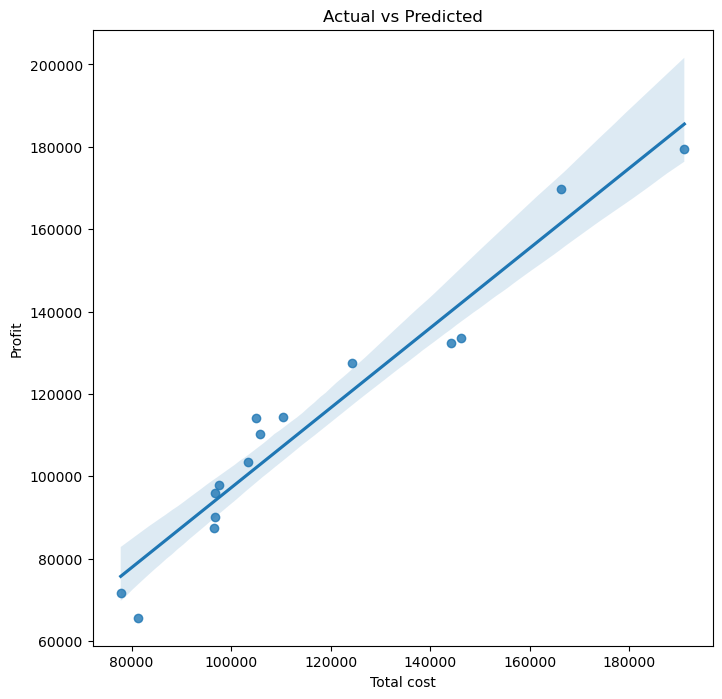

In [25]:
plt.title('Actual vs Predicted')
plt.xlabel('Total cost')
plt.ylabel('Profit')
sns.regplot(x=y_test, y=y_pred, data=df)

As can be seen, the line fit is performing well. Finally, we have a good linear regression model with a decent line fit, as evident from scores, metrics, and graphs.

# Thank You!